<a href="https://colab.research.google.com/github/paolala24/proyecto_final/blob/main/Conceptos_clave_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceptos Clave


## 1. Transformada de Fourier (FT, DFT, FFT)

### ¿Qué es la Transformada de Fourier?

La Transformada de Fourier permite representar una señal en el dominio de la frecuencia. Es una herramienta clave en procesamiento de señales porque nos muestra qué frecuencias están presentes en una señal y con qué intensidad.

### Tipos de transformadas

- **FT (Transformada de Fourier continua)**:   Convierte una señal continua en tiempo $x(t)$ a su espectro de frecuencias continuas $X(f) $.
  $$
  X(f) = \int_{-\infty}^{\infty} x(t) \cdot e^{-j2\pi f t} \, dt$$


- **DTFT (Transformada de Fourier discreta en tiempo)**: Para señales discretas infinitas.
  $$
  X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] \cdot e^{-j\omega n}
  $$
  

- **DFT (Transformada Discreta de Fourier)**:   Analiza una señal finita y discreta $x[n]$, devolviendo sus componentes frecuenciales.
  $$
  X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N}kn}, \quad k = 0, 1, \dots, N-1
  $$*

- **FFT (Fast Fourier Transform)**:
  Es una implementación rápida de la DFT. Reduce el costo computacional de \$$\mathcal{O}(N^2) \) a \( \mathcal{O}(N \log N) \).$$

### ¿Para qué sirve?

- Analizar señales de audio, video, telecomunicaciones.
- Detectar frecuencias dominantes.
- Filtrar o limpiar señales.
- Comprimir información.
- Modular y demodular señales en telecomunicaciones.

### Ejemplo: Señal compuesta

Supongamos una señal compuesta por dos senoidales:

$$x(t) = \sin(2\pi \cdot 50t) + 0.5\cdot \sin(2\pi \cdot 120t)$$

Esta señal tiene componentes en 50 Hz y 120 Hz.

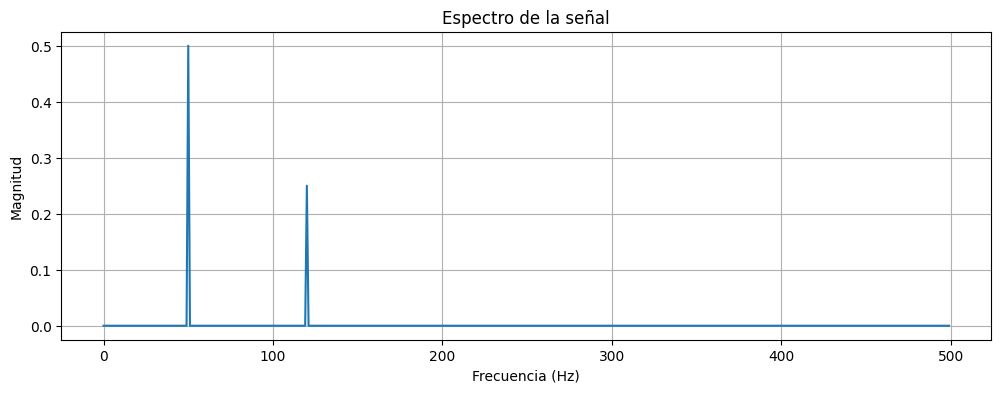

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1      # Duración (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Señal compuesta
x = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

# FFT
X = np.fft.fft(x)
f = np.fft.fftfreq(len(t), 1/fs)

# Magnitud
X_magnitude = np.abs(X) / len(t)

# Mostrar solo la parte positiva del espectro
mask = f >= 0

plt.figure(figsize=(12, 4))
plt.plot(f[mask], X_magnitude[mask])
plt.title('Espectro de la señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


## 2. Filtrado Digital (FIR/IIR)

### ¿Qué es un filtro digital?

Un filtro digital es una operación matemática aplicada a una señal discreta (digital) para modificar su contenido en frecuencia. Por ejemplo:

- Atenuar ruidos de alta frecuencia.
- Eliminar frecuencias no deseadas.
- Separar bandas específicas (como bajos, medios o agudos).

---

### Tipos de filtros según su respuesta al impulso

### FIR: Filtro de Respuesta Finita al Impulso
- Tiene una respuesta que termina en un número finito de muestras.
- Generalmente estable y lineal en fase (no distorsiona la forma de la señal).
- Forma general:
  $$
  y[n] = \sum_{k=0}^{N} b_k \cdot x[n-k]
  $$

### IIR: Filtro de Respuesta Infinita al Impulso
- Su respuesta puede durar infinitamente (por retroalimentación).
- Es más eficiente (menos coeficientes), pero puede no ser lineal en fase y potencialmente inestable si no se diseña bien.
- Forma general:
  $$
  y[n] = \sum_{k=0}^{M} b_k \cdot x[n-k] - \sum_{k=1}^{N} a_k \cdot y[n-k]
  $$


### Clasificación por tipo de frecuencia

- **Pasa-bajo**: deja pasar frecuencias bajas, atenúa las altas.
- **Pasa-alto**: deja pasar frecuencias altas.
- **Pasa-banda**: deja pasar un rango específico de frecuencias.
- **Rechaza-banda**: atenúa un rango específico.


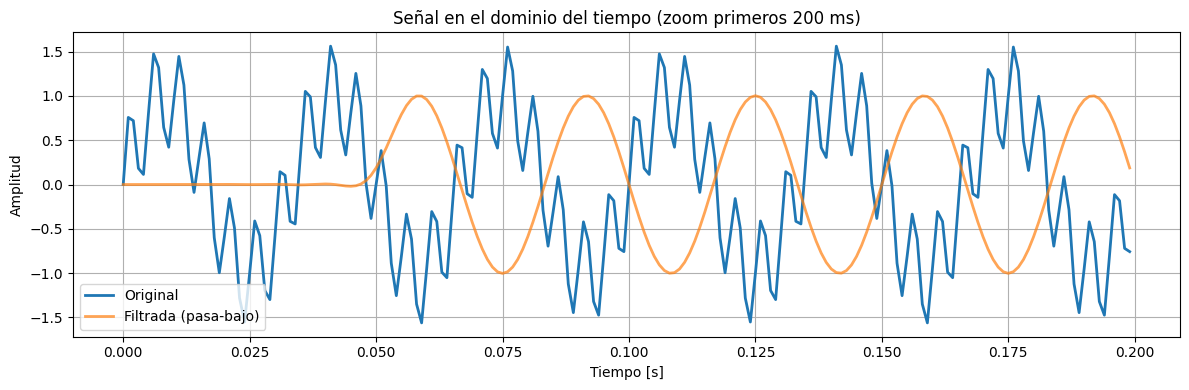

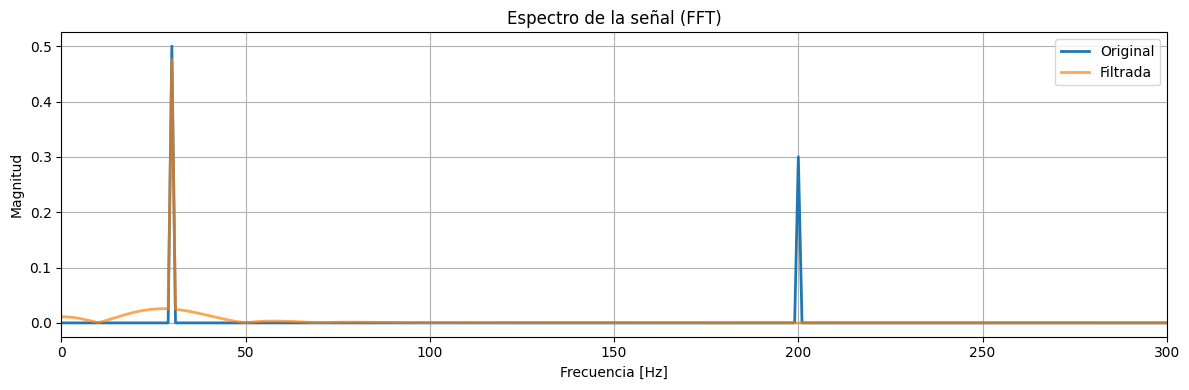

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Parámetros
fs = 1000       # Frecuencia de muestreo (Hz)
T = 1           # Duración total (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Señal compuesta: baja (30 Hz) + alta (200 Hz)
x = np.sin(2*np.pi*30*t) + 0.6*np.sin(2*np.pi*200*t)

# Filtro FIR pasa-bajo (corte a 100 Hz)
nyq = fs / 2
cutoff = 100        # Frecuencia de corte en Hz
orden = 101         # Número de coeficientes (orden + 1)
filtro = firwin(orden, cutoff / nyq)  # Ventana de Hamming por defecto

# Aplicar filtro
y = lfilter(filtro, 1.0, x)

# ========== GRAFICAR EN TIEMPO ==========
plt.figure(figsize=(12, 4))
plt.plot(t[:200], x[:200], label='Original', linewidth=2)
plt.plot(t[:200], y[:200], label='Filtrada (pasa-bajo)', linewidth=2, alpha=0.7)
plt.title('Señal en el dominio del tiempo (zoom primeros 200 ms)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ========== GRAFICAR EN FRECUENCIA ==========
def espectro(signal):
    X = np.fft.fft(signal)
    f = np.fft.fftfreq(len(X), 1/fs)
    return f[f >= 0], np.abs(X[f >= 0]) / len(signal)

f_x, X_mag = espectro(x)
f_y, Y_mag = espectro(y)

plt.figure(figsize=(12, 4))
plt.plot(f_x, X_mag, label='Original', linewidth=2)
plt.plot(f_y, Y_mag, label='Filtrada', linewidth=2, alpha=0.7)
plt.title('Espectro de la señal (FFT)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 300)  # Zoom hasta 300 Hz
plt.legend()
plt.tight_layout()
plt.show()


## 3. Señales Analíticas y Transformada de Hilbert

### ¿Qué es la Transformada de Hilbert?

La Transformada de Hilbert es una operación matemática que permite generar una señal desfasada 90° respecto a una señal original.

Se usa para construir la señal analítica, que combina una señal real con su versión desfasada, y permite separar componentes en fase (I) y en cuadratura (Q), fundamentales en telecomunicaciones modernas.

### Definición matemática

Dada una señal real $x(t)$, su Transformada de Hilbert $\hat{x}(t)$ es:

$$
\hat{x}(t) = \mathcal{H}\{x(t)\} = \frac{1}{\pi} \cdot \text{p.v.} \int_{-\infty}^{\infty} \frac{x(\tau)}{t - \tau} \, d\tau
$$

Donde *p.v.* es el valor principal de Cauchy.

### ¿Para qué sirve?

- Obtener la parte imaginaria de una señal real → útil para construir la señal analítica:
  $$
  z(t) = x(t) + j \cdot \hat{x}(t)
  $$

- Permite obtener la fase instantánea y la envolvente de una señal:
  - Magnitud: $|z(t)| = \sqrt{x^2(t) + \hat{x}^2(t)} $
  - Fase: $\phi(t) = \arg(z(t)) = \arctan\left(\frac{\hat{x}(t)}{x(t)}\right)$

- Base para construir señales I/Q en modulación QAM o AM-SSB.

---

### Ejemplo

Obtener la señal analítica y la parte en cuadratura (Q) a partir de una senoidal:



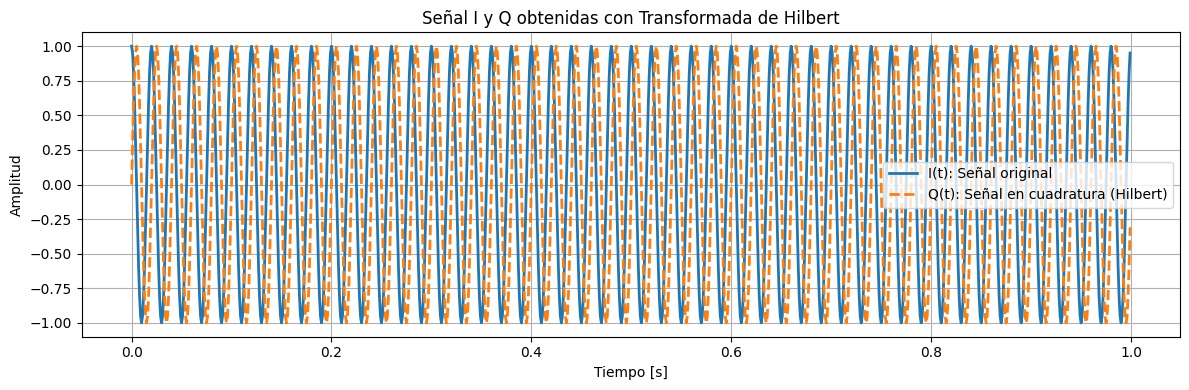

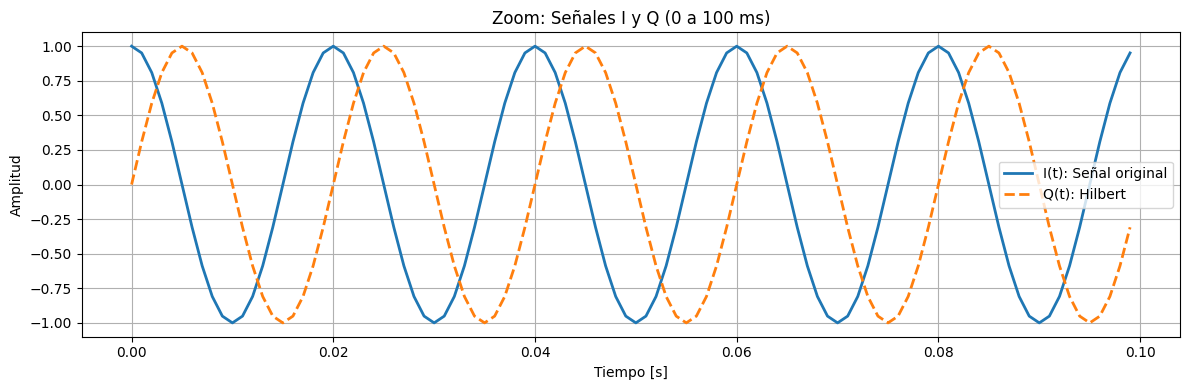

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Señal base (real)
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
x = np.cos(2*np.pi*50*t)

# Aplicar transformada de Hilbert
z = hilbert(x)
q = np.imag(z)  # Parte en cuadratura

# Graficar señal I (original) y Q (Hilbert)
plt.figure(figsize=(12, 4))
plt.plot(t, x, label='I(t): Señal original', linewidth=2)
plt.plot(t, q, label='Q(t): Señal en cuadratura (Hilbert)', linestyle='--', linewidth=2)
plt.title('Señal I y Q obtenidas con Transformada de Hilbert')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar zoom de la señal I(t) y Q(t) - primeros 100 ms
plt.figure(figsize=(12, 4))
plt.plot(t[:100], x[:100], label='I(t): Señal original', linewidth=2)
plt.plot(t[:100], q[:100], label='Q(t): Hilbert', linestyle='--', linewidth=2)
plt.title('Zoom: Señales I y Q (0 a 100 ms)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Señales I/Q y Modulación QAM

### ¿Qué son las señales I/Q?

Las señales I/Q (In-phase y Quadrature) representan una señal compleja como combinación de dos componentes reales:

- **I(t)**: componente en fase → coseno.
- **Q(t)**: componente en cuadratura → seno (desfasada 90°).

Se escriben juntas como:
$$
s(t) = I(t) \cdot \cos(2\pi f_c t) - Q(t) \cdot \sin(2\pi f_c t)
$$

Esto permite **modular amplitud y fase** al mismo tiempo → se usa en WiFi, 5G, SDR, etc.

### ¿Qué es la modulación QAM?

**QAM (Quadrature Amplitude Modulation)** combina:
- Modulación en amplitud (como AM).
- Modulación en fase (como PM).

Permite transmitir **varios bits por símbolo** al representar cada combinación de bits como un **punto en el plano I-Q** (constelación).

Ejemplo:  
- **4-QAM** → 2 bits por símbolo.  
- **16-QAM** → 4 bits por símbolo.  
- **64-QAM** → 6 bits por símbolo.

### Constelación QAM

Cada punto de la constelación representa una combinación distinta de bits. Por ejemplo, en **16-QAM** hay 16 puntos con diferentes valores de I y Q:

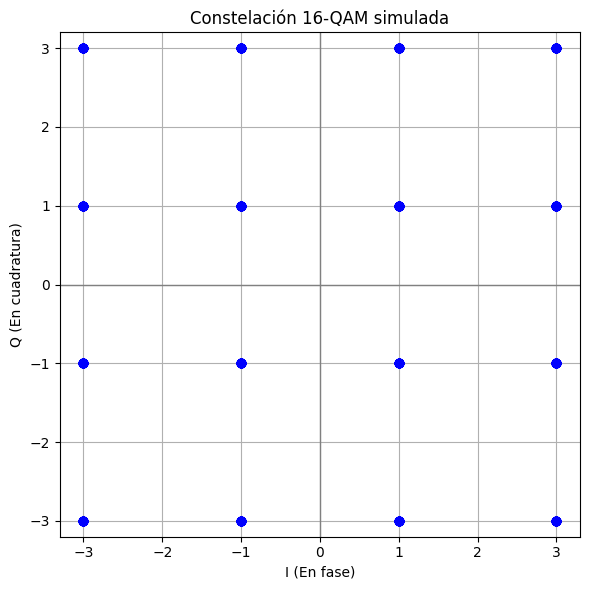

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Mapeo QAM (4 niveles en I y Q): {-3, -1, +1, +3}
niveles = [-3, -1, 1, 3]

# Número de símbolos
N = 1000

# Generar I y Q aleatorios
I = np.random.choice(niveles, size=N)
Q = np.random.choice(niveles, size=N)

# Formar señal compleja (modulada)
s = I + 1j*Q

# Graficar constelación
plt.figure(figsize=(6, 6))
plt.plot(np.real(s), np.imag(s), 'bo', alpha=0.4)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.title('Constelación 16-QAM simulada')
plt.xlabel('I (En fase)')
plt.ylabel('Q (En cuadratura)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


## 5. OFDM

### ¿Qué es OFDM?

OFDM (Orthogonal Frequency Division Multiplexing) es una técnica de modulación que divide el ancho de banda en múltiples subportadoras ortogonales, y transmite datos en todas ellas simultáneamente.

En vez de enviar todos los bits en una sola frecuencia (como en AM o QAM tradicional), OFDM reparte la información en muchas pequeñas portadoras, cada una con su propio canal lento.

### ¿Por qué "ortogonales"?

Las subportadoras están separadas de tal forma que sus funciones seno/coseno no interfieren entre sí, es decir:
$$
\int_0^T \cos(2\pi f_i t) \cdot \cos(2\pi f_j t) \, dt = 0 \quad \text{si } i \neq j
$$

Esto permite que puedan solaparse en frecuencia sin interferencia.

### ¿Cómo funciona?

1. Se dividen los bits en bloques.
2. Cada bloque se asigna a una **subportadora**.
3. Se modula cada subportadora (por ejemplo, con QAM).
4. Todas las subportadoras se suman para crear la señal transmitida.
5. Se usa la IFFT para generar la señal en el tiempo.

En el receptor, se aplica la **FFT** para separar las subportadoras y decodificar los símbolos.


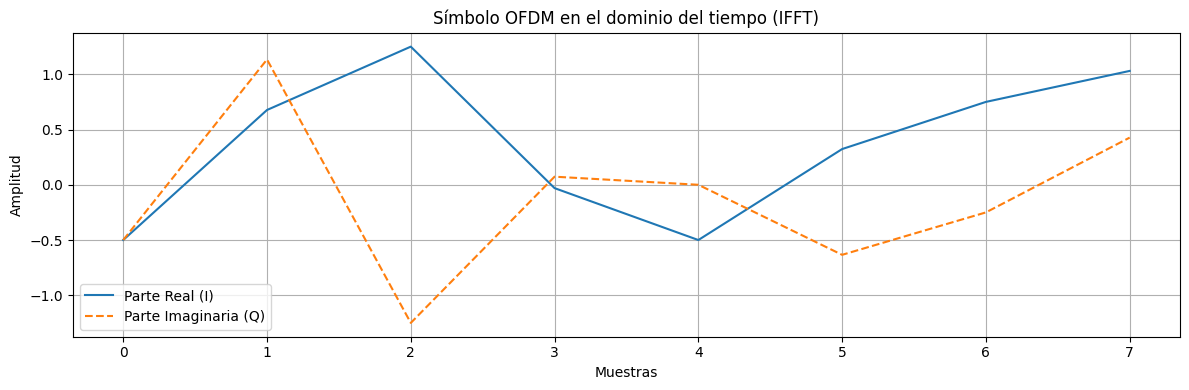

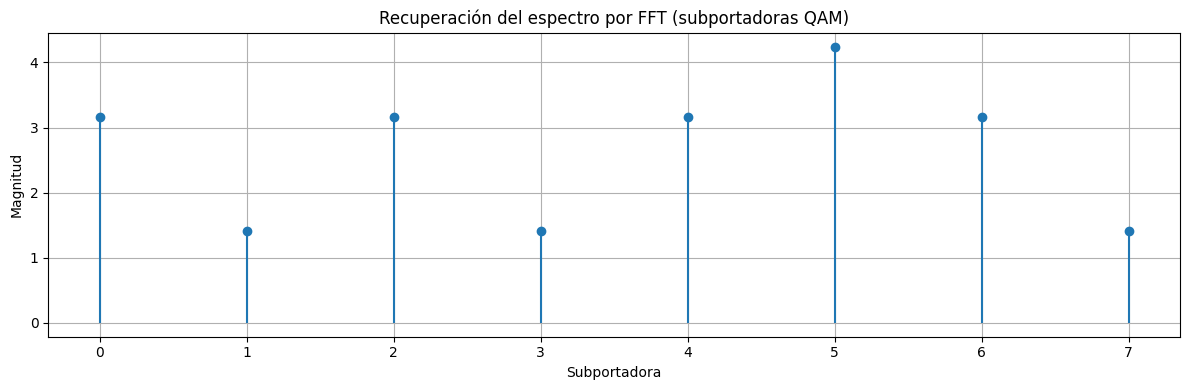

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Número de subportadoras
N = 8

# Datos QAM aleatorios (simplificados: valores reales)
datos = np.random.choice([-3, -1, 1, 3], size=N) + 1j*np.random.choice([-3, -1, 1, 3], size=N)

# Aplicar IFFT para obtener señal OFDM
ofdm_signal = np.fft.ifft(datos)

# Tiempo discreto
t = np.arange(N)

# Graficar señal OFDM (tiempo)
plt.figure(figsize=(12, 4))
plt.plot(t, np.real(ofdm_signal), label='Parte Real (I)')
plt.plot(t, np.imag(ofdm_signal), label='Parte Imaginaria (Q)', linestyle='--')
plt.title('Símbolo OFDM en el dominio del tiempo (IFFT)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Graficar espectro (FFT)
f = np.fft.fft(ofdm_signal)

plt.figure(figsize=(12, 4))
plt.stem(np.arange(N), np.abs(f), basefmt=" ")
plt.title('Recuperación del espectro por FFT (subportadoras QAM)')
plt.xlabel('Subportadora')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()



## 6. Comunicaciones WiFi y 5G

### ¿Qué son WiFi y 5G?

WiFi y 5G son tecnologías que permiten la transmisión inalámbrica de datos digitales usando ondas electromagnéticas. Aunque tienen distintas aplicaciones (WiFi en redes locales, 5G en redes móviles), ambas comparten una base técnica común:

- **Modulación digital (QAM)**
- **Multiplexación (OFDM)**
- **Separación de componentes I/Q**
- **Transformada rápida de Fourier (FFT)**
- **Filtrado digital**

Estas tecnologías hacen posible la conexión de millones de dispositivos con alta velocidad y baja latencia.

### ¿Cómo funcionan?

Las etapas típicas de transmisión (simplificadas) son:

1. **Codificación y Modulación QAM**  
   Los bits se agrupan y se convierten en símbolos que representan puntos en una constelación QAM.

2. **Multiplexación OFDM**  
   Cada símbolo QAM se asigna a una subportadora ortogonal. Se aplica la **IFFT** para convertir al dominio del tiempo.

3. **Generación de señales I/Q**  
   Se separa la señal en componentes en fase (I) y cuadratura (Q), usando la transformada de Hilbert.

4. **Transmisión**  
   Se transmite la señal $$s(t) = I(t)\cos(2\pi f_c t) - Q(t)\sin(2\pi f_c t)$$

5. **Recepción y Demodulación**  
   En el receptor se aplica la **FFT**, se extraen los símbolos QAM y se recuperan los bits originales.


### **Fases del proyecto y metodologia**

### Simulacion basica

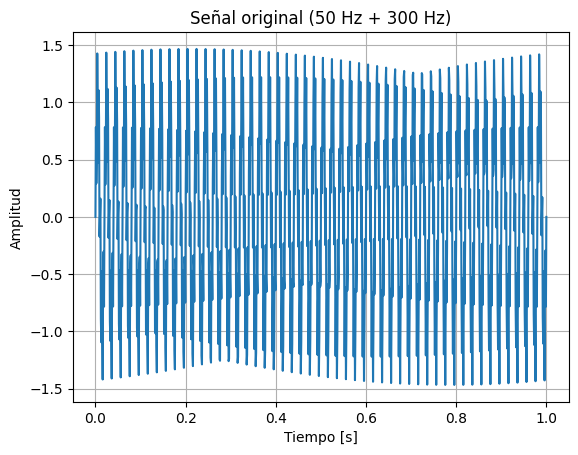

In [14]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000                         # Frecuencia de muestreo
t = np.linspace(0, 1, fs)         # 1 segundo de duración, 1000 muestras
xo = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 300 * t)  # Señal compuesta (50 Hz + 300 Hz)

# Graficar señal original en el tiempo
plt.plot(t, xo)
plt.title("Señal original (50 Hz + 300 Hz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

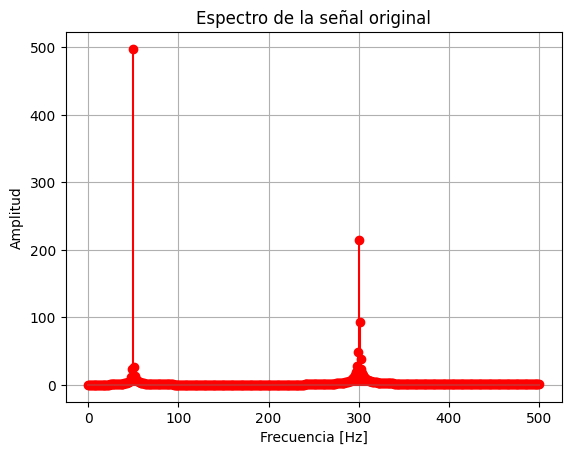

In [15]:
vf = np.fft.rfftfreq(len(xo), 1/fs)  # Vector de frecuencias
Xw = np.fft.rfft(xo)                 # FFT de la señal

# Graficar espectro original
plt.stem(vf, abs(Xw), 'r')
plt.title("Espectro de la señal original")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

In [16]:
from scipy.signal import butter as bw, freqz_zpk, lfilter
# Parámetros del filtro
N = 4               # Orden del filtro
Wn = 100            # Frecuencia de corte (Hz)
filt = 'lowpass'    # Tipo de filtro
out = 'zpk'         # Queremos ceros, polos y ganancia (para Bode)

# Crear filtro Butterworth
zeros, poles, gain = bw(N, Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs)


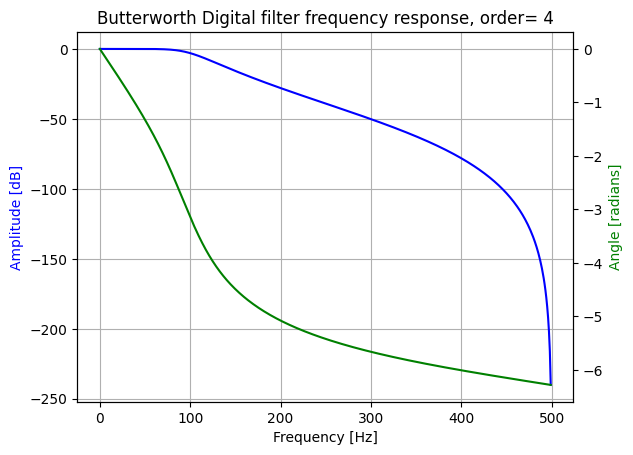

In [17]:
def plot_freq_response(filter_name, w, h, N):
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.set_title(filter_name + ' Digital filter frequency response, order= ' + str(N))
    ax1.plot(w, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequency [Hz]')
    ax1.grid()
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Angle [radians]', color='g')
    plt.axis('tight')
    plt.show()

# Diagrama de Bode del filtro
plot_freq_response('Butterworth', w, h, N)


In [18]:
# Para aplicar el filtro necesitamos coeficientes ba
b, a = bw(N, Wn, btype=filt, output='ba', fs=fs)

# Aplicar filtro (paso-bajo IIR)
x_filtrada = lfilter(b, a, xo)


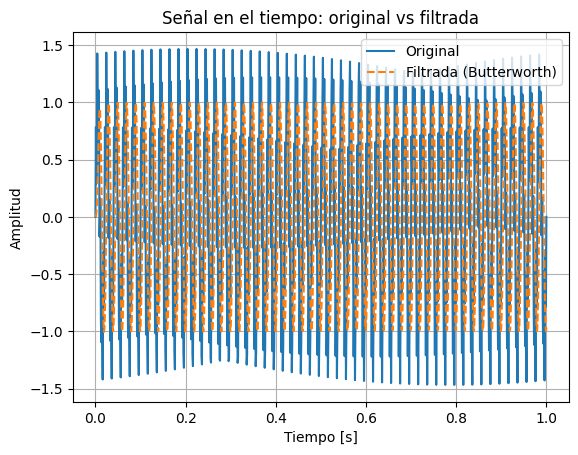

In [19]:
plt.plot(t, xo, label='Original')
plt.plot(t, x_filtrada, label='Filtrada (Butterworth)', linestyle='--')
plt.title("Señal en el tiempo: original vs filtrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

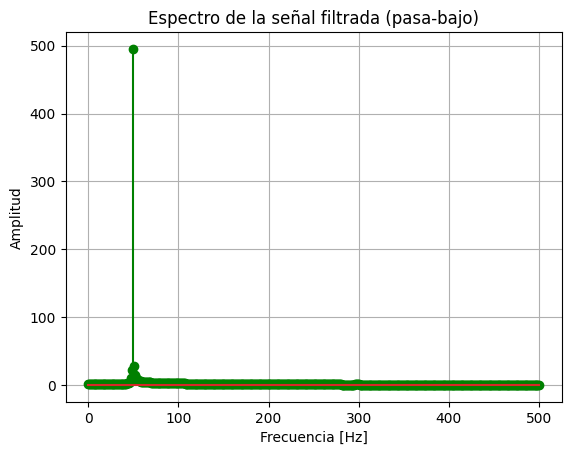

In [20]:
vf = np.fft.rfftfreq(len(x_filtrada), 1/fs)
Xw_filtrada = np.fft.rfft(x_filtrada)

plt.stem(vf, abs(Xw_filtrada), 'g')
plt.title("Espectro de la señal filtrada (pasa-bajo)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

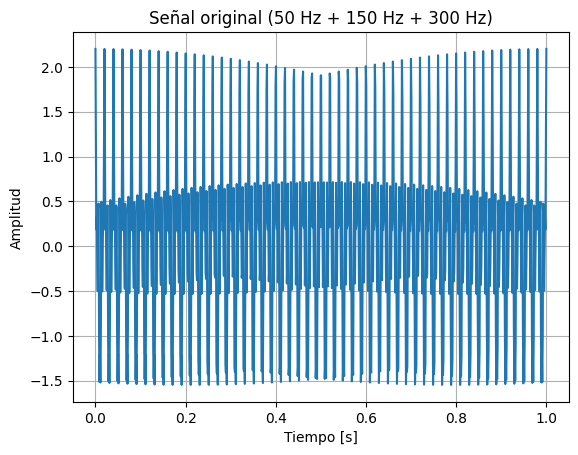

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter as bw, freqz_zpk, lfilter

# Parámetros de muestreo
fs = 1000
t = np.linspace(0, 1, fs)

# Señal compuesta de 3 frecuencias
xo = np.cos(2*np.pi*50*t) + 0.7*np.cos(2*np.pi*150*t) + 0.5*np.cos(2*np.pi*300*t)

# Señal en el tiempo
plt.plot(t, xo)
plt.title("Señal original (50 Hz + 150 Hz + 300 Hz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


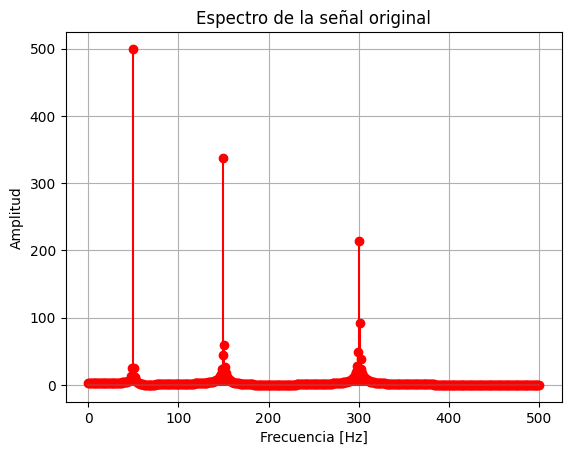

In [22]:
vf = np.fft.rfftfreq(len(xo), 1/fs)
Xw = np.fft.rfft(xo)

# Espectro
plt.stem(vf, abs(Xw), 'r')
plt.title("Espectro de la señal original")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


In [23]:
from scipy.signal import cheby1, freqz_zpk

# Parámetros del filtro
N = 4                 # Orden del filtro
ripple = 1            # Ripple en dB en banda pasante
Wn = 149             # Frecuencia de corte
filt = 'lowpass'      # Tipo del filtro
out = 'zpk'           # Salida: ceros, polos y ganancia

# Crear el filtro Chebyshev tipo I
zeros, poles, gain = cheby1(N, rp=ripple, Wn=Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs)


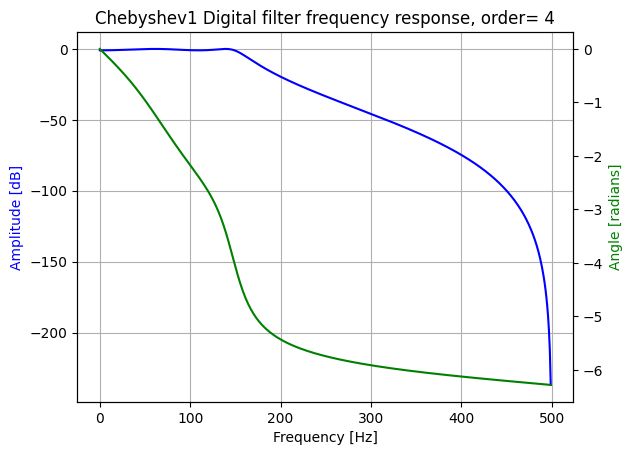

In [24]:
plot_freq_response('Chebyshev1', w, h, N)

In [25]:
from scipy.signal import cheby1, lfilter

# Obtener coeficientes ba para aplicar el filtro
b, a = cheby1(N, rp=ripple, Wn=Wn, btype=filt, output='ba', fs=fs)

# Aplicar filtro a la señal multicomponente
x_cheby = lfilter(b, a, xo)


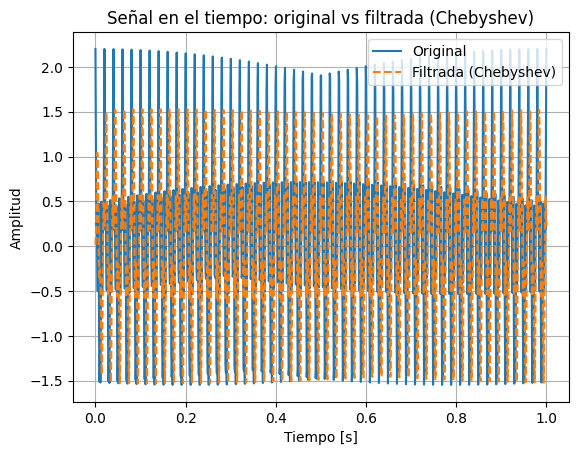

In [26]:
plt.plot(t, xo, label='Original')
plt.plot(t, x_cheby, label='Filtrada (Chebyshev)', linestyle='--')
plt.title("Señal en el tiempo: original vs filtrada (Chebyshev)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()


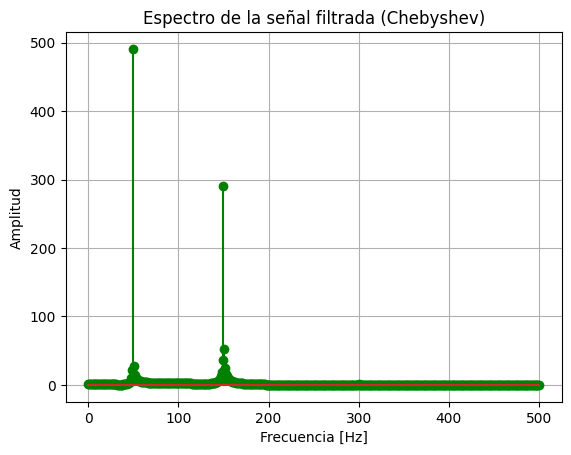

In [27]:
Xw_cheby = np.fft.rfft(x_cheby)

plt.stem(vf, abs(Xw_cheby), 'g')
plt.title("Espectro de la señal filtrada (Chebyshev)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


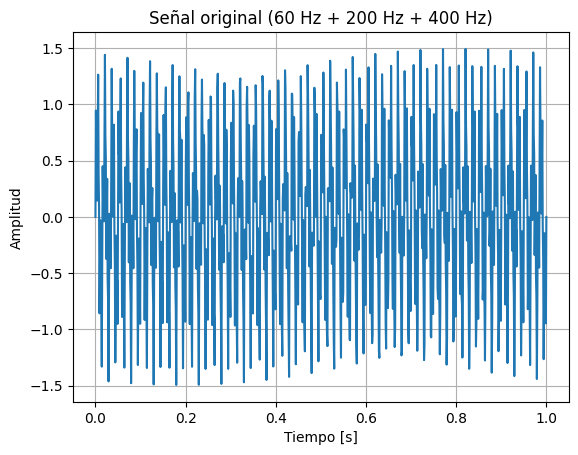

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ellip, freqz, lfilter

# Parámetros
fs = 1000
t = np.linspace(0, 1, fs)

# Señal: suma de frecuencias distintas (60, 200, 400 Hz)
xo = 0.8*np.sin(2*np.pi*60*t) + 0.5*np.sin(2*np.pi*200*t) + 0.3*np.sin(2*np.pi*400*t)

# Señal en el tiempo
plt.plot(t, xo)
plt.title("Señal original (60 Hz + 200 Hz + 400 Hz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


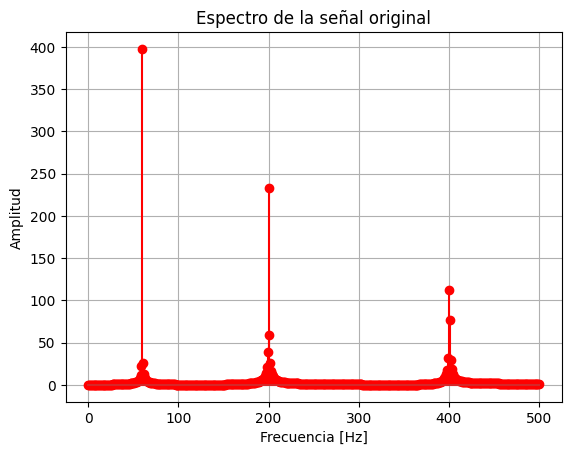

In [29]:
vf = np.fft.rfftfreq(len(xo), 1/fs)
Xw = np.fft.rfft(xo)

plt.stem(vf, abs(Xw), 'r')
plt.title("Espectro de la señal original")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


In [30]:
from scipy.signal import ellip, freqz

# Parámetros del filtro
N = 4
ripple_pass = 2     # dB en banda pasante
ripple_stop = 30    # dB de atenuación en banda rechazada
Wn = 100            # Frecuencia de corte en Hz
filt = 'lowpass'
out = 'ba'

# Coeficientes del filtro elíptico
num, den = ellip(N, rp=ripple_pass, rs=ripple_stop, Wn=Wn, btype=filt, output=out, fs=fs)

# Respuesta en frecuencia
w, h = freqz(num, den, fs=fs)


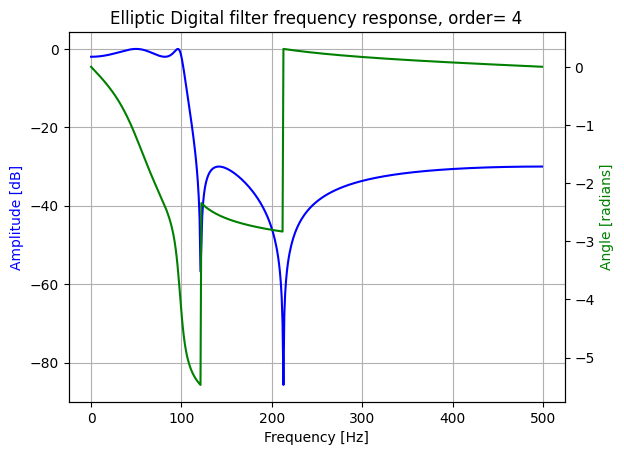

In [31]:
plot_freq_response('Elliptic', w, h, N)

In [32]:
x_filtrada = lfilter(num, den, xo)

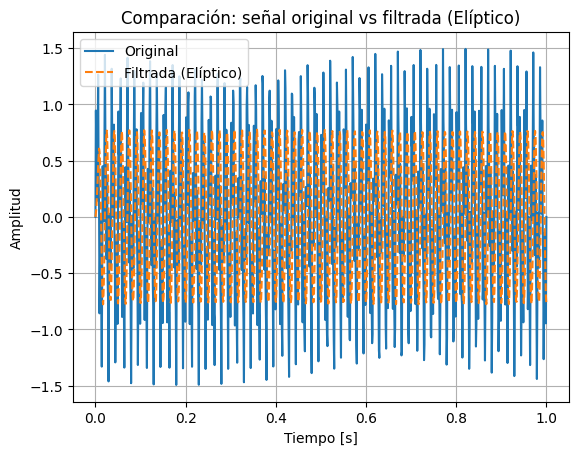

In [33]:
plt.plot(t, xo, label='Original')
plt.plot(t, x_filtrada, label='Filtrada (Elíptico)', linestyle='--')
plt.title("Comparación: señal original vs filtrada (Elíptico)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

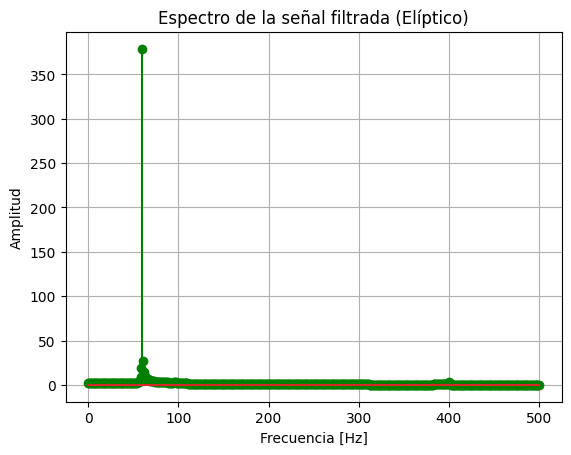

In [34]:
Xw_filtrada = np.fft.rfft(x_filtrada)

plt.stem(vf, abs(Xw_filtrada), 'g')
plt.title("Espectro de la señal filtrada (Elíptico)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()